In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

sns.set_theme(font_scale=1.5)

In [110]:
traj = pd.read_csv("../build/part_traj.txt", names=['x', 'y', 'z', 'E'])
traj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628 entries, 0 to 3627
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3628 non-null   float64
 1   y       3628 non-null   float64
 2   z       3628 non-null   float64
 3   E       3628 non-null   float64
dtypes: float64(4)
memory usage: 113.5 KB


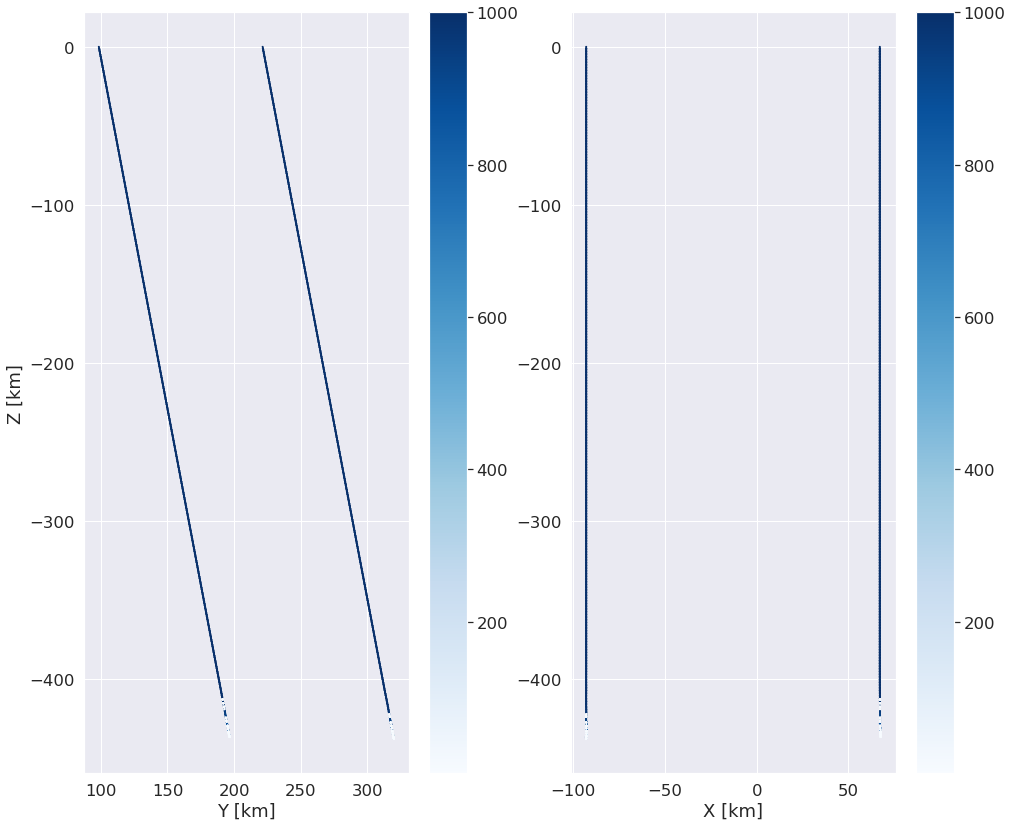

In [111]:
plt.figure(figsize=(16,14));
plt.subplot(1,2,1);
plt.scatter(traj.y/1000, traj.z/1000, s=1, c=traj.E, cmap='Blues');
plt.colorbar();
plt.xlabel('Y [km]');
plt.ylabel('Z [km]');

plt.subplot(1,2,2);
plt.scatter(traj.x/1000, traj.z/1000, s=1, c=traj.E, cmap='Blues');
plt.colorbar();
plt.xlabel('X [km]');

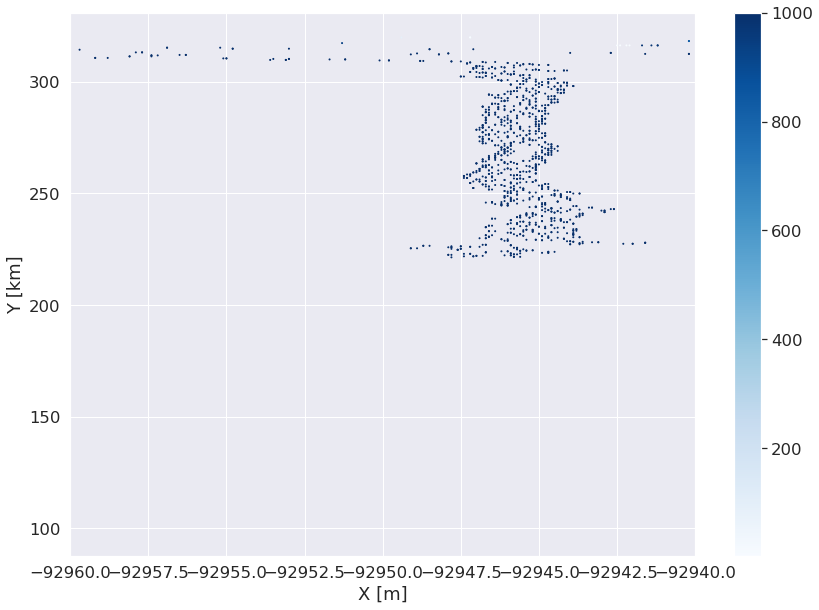

In [112]:
plt.figure(figsize=(14,10));
plt.scatter(traj.x, traj.y/1000, s=1, c=traj.E, cmap='Blues');
plt.colorbar();
plt.xlabel('X [m]');
plt.ylabel('Y [km]');

plt.xlim([-92960, -92940]);

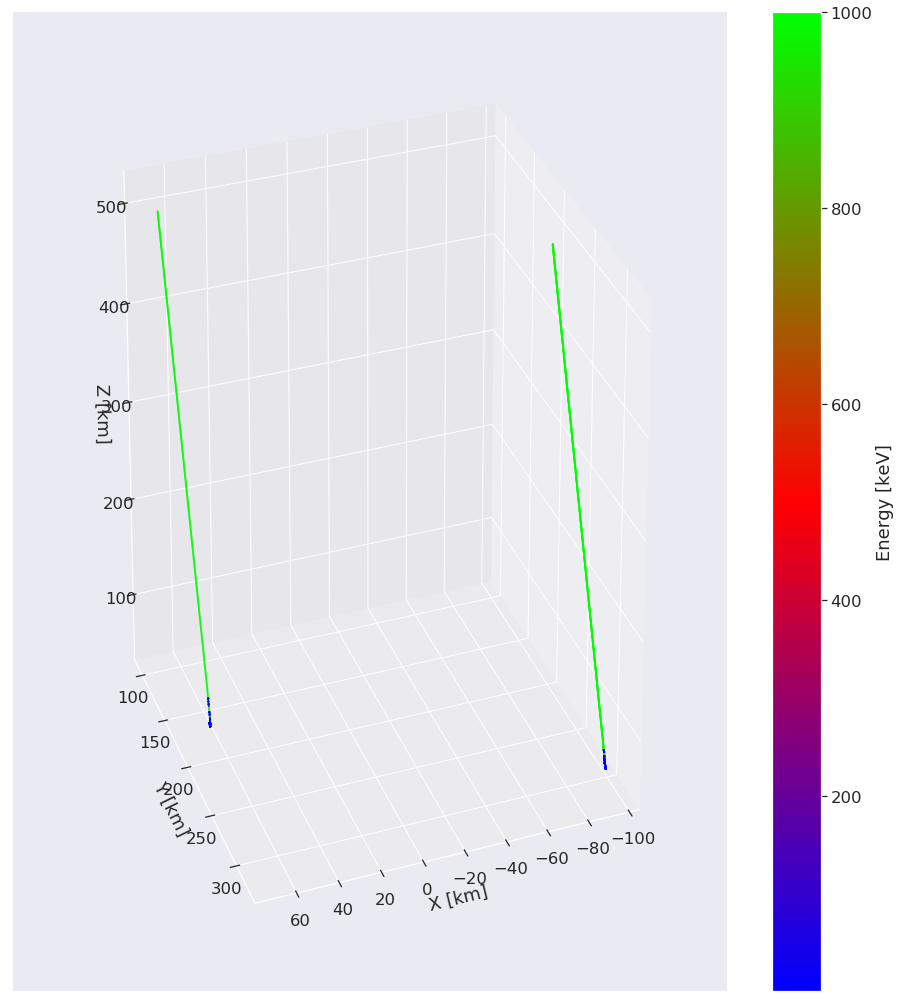

In [113]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(16,18))
ax = plt.axes(projection='3d')

cm = ax.scatter(traj.x/1e3, traj.y/1e3, traj.z/1e3+500, c=traj.E, cmap='brg', s=1);

ax.view_init(25, 70);
plt.colorbar(cm, label='Energy [keV]');
ax.set_xlabel('X [km]'); ax.set_ylabel('Y [km]'); ax.set_zlabel('Z [km]');

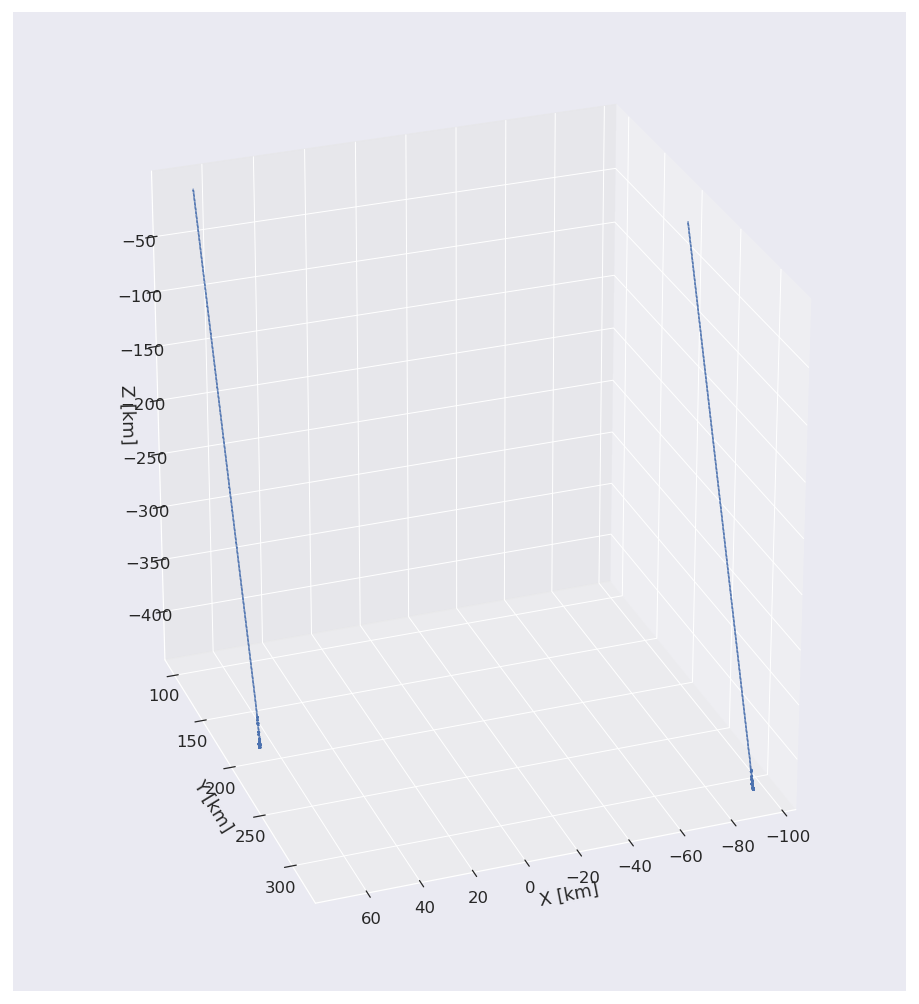

In [114]:
fig = plt.figure(figsize=(16,18))
ax = plt.axes(projection='3d')

cm = ax.quiver(traj.x[0:-1]/1e3,
                traj.y[0:-1]/1e3,
                traj.z[0:-1]/1e3,
                np.diff(traj.x), 
                np.diff(traj.y), 
                np.diff(traj.z+500*1e3), normalize=True, length=0.5);

ax.view_init(25, 70);
#plt.colorbar(cm, label='Energy [keV]');
ax.set_xlabel('X [km]'); ax.set_ylabel('Y [km]'); ax.set_zlabel('Z [km]');